In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from scipy.io import savemat
import os
from IPython.display import display, Markdown
import pickle

# load data

In [2]:
data_path = "data/"
score_path = "{}/Clustering_silhouette/".format(data_path)
cdf_path = "{}/CDF plots/".format(data_path)
tsne_path = "{}/TSNEplots/".format(data_path)
KCC_path = "{}/KCC/".format(data_path)
f_stat_path = '{}/F_stat/'.format(data_path)
refer_id = pd.read_csv("data/ProteomeViewMICEimputed.csv", index_col=0)

In [3]:
physio_view = pd.read_csv("data/PhysioViewNormalImputed.csv", index_col=0)

contextual_view = pd.read_csv("data/ContextualViewZeroImputed.csv", index_col=0)
clinical_view = pd.concat([physio_view, contextual_view], 1)
clinical_view = clinical_view.loc[
    :,
    ~clinical_view.columns.isin(
        ["pupils", "crp.high", "neonate", "abx.change.cfz", "abx.change.ery"]
    ),
]
proteome_view = pd.read_csv("data/ProteomeViewMICEimputed.csv", index_col=0)

# define feature groups

In [4]:
physio_view_cols = [
    "temp.high",
    "temp.low",
    "rr.high",
    "sato2.low",
    "hr.high",
    "cap.refill",
    "sbp.low",
    "map.low",
    "gcs.low",
    "fio2.high",
    "wcc.high",
    "wcc.low",
    "anc.low",
    "lymph.low",
    "platelets.low",
    "paco2.high",
    "pao2.low",
    "lactate.high",
    "bili.high",
    "crea.high",
    "inr.high",
    "alat.high",
    "age.at.bc",
    "ccc.summary",
    "niv",
    "iv",
    "hfnc",
    "ecls",
    "inotrope",
    "crrt",
]


contextual_view_cols = [
    "ccc.neuro",
    "ccc.cardio",
    "ccc.pulmo",
    "ccc.uro",
    "ccc.gastro",
    "ccc.haemimmuno",
    "ccc.metabol",
    "ccc.malform",
    "ccc.onco",
    "ccc.neo",
    "ccc.surg",
    "ccc.techdep",
    "ccc.transplant",
    "abx.change.pen",
    "abx.change.oxa",
    "abx.change.pip",
    "abx.change.cla",
    "abx.change.cxm",
    "abx.change.cro",
    "abx.change.fep",
    "abx.change.mem",
    "abx.change.amk",
    "abx.change.van",
    "abx.change.cip",
    "abx.change.lzd",
    "abx.change.cli",
    "abx.change.mtz",
    "abx.change.sxt",
    "focus_abdominal",
    "focus_clabsi",
    "focus_cns",
    "focus_earnosethroat",
    "focus_endocarditis",
    "focus_osteoarticular",
    "focus_other",
    "focus_pneumonia",
    "focus_primbsi",
    "focus_skin",
    "focus_toxic_shock",
    "focus_uti",
    "focus_wound",
    "patho_candida",
    "patho_cons",
    "patho_ecoli",
    "patho_enterococcus",
    "patho_hinfluenzae",
    "patho_klebsiella",
    "patho_nmeningitidis",
    "patho_othergneg",
    "patho_othergpos",
    "patho_paeruginosa",
    "patho_sagalactiae",
    "patho_saureus",
    "patho_spneumoniae",
    "patho_spyogenes",
    "patho_viridansgroup",
    "cahai_ca",
    "cahai_eos",
    "cahai_hai",
    "cahai_los.ca",
    "cahai_los.hai",
    "cate_comorbidity",
    "cate_healthy",
    "cate_neonate",
    "eth_african",
    "eth_asian",
    "eth_caucasian",
    "eth_jewish",
    "eth_mixed",
    "sex",
]

all_cols = physio_view_cols + contextual_view_cols

In [5]:
demographics = [
    "cate_neonate",
    "eth_asian",
    "eth_mixed",
    "eth_caucasian",
    "eth_african",
    "eth_jewish",
    "sex",
]

chronic_conditions = [
    "ccc.neuro",
    "ccc.cardio",
    "ccc.pulmo",
    "ccc.uro",
    "ccc.gastro",
    "ccc.haemimmuno",
    "ccc.metabol",
    "ccc.malform",
    "ccc.onco",
    "ccc.neo",
    "ccc.surg",
    "ccc.techdep",
    "ccc.transplant",
    "cate_comorbidity",
    "cate_healthy",
]


infections = [
    "focus_abdominal",
    "focus_clabsi",
    "focus_cns",
    "focus_earnosethroat",
    "focus_endocarditis",
    "focus_osteoarticular",
    "focus_other",
    "focus_pneumonia",
    "focus_primbsi",
    "focus_skin",
    "focus_toxic_shock",
    "focus_uti",
    "focus_wound",
    "cahai_ca",
    "cahai_eos",
    "cahai_hai",
    "cahai_los.ca",
    "cahai_los.hai",
]


pathogen = [
    "patho_candida",
    "patho_cons",
    "patho_ecoli",
    "patho_enterococcus",
    "patho_hinfluenzae",
    "patho_klebsiella",
    "patho_nmeningitidis",
    "patho_othergneg",
    "patho_othergpos",
    "patho_paeruginosa",
    "patho_sagalactiae",
    "patho_saureus",
    "patho_spneumoniae",
    "patho_spyogenes",
    "patho_viridansgroup",
]


abx_treatment = [
    "abx.change.pen",
    "abx.change.oxa",
    "abx.change.pip",
    "abx.change.cla",
    "abx.change.cxm",
    "abx.change.cro",
    "abx.change.fep",
    "abx.change.mem",
    "abx.change.amk",
    "abx.change.van",
    "abx.change.cip",
    "abx.change.lzd",
    "abx.change.cli",
    "abx.change.mtz",
    "abx.change.sxt",
]

treatment = [
    "abx.change.pen",
    "abx.change.oxa",
    "abx.change.pip",
    "abx.change.cla",
    "abx.change.cxm",
    "abx.change.cro",
    "abx.change.fep",
    "abx.change.mem",
    "abx.change.amk",
    "abx.change.van",
    "abx.change.cip",
    "abx.change.lzd",
    "abx.change.cli",
    "abx.change.mtz",
    "abx.change.sxt",
    "niv",
    "iv",
    "hfnc",
    "ecls",
    "inotrope",
    "crrt",
]


In [6]:
demographics = [
    "cate_neonate",
    "eth_asian",
    "eth_mixed",
    "eth_caucasian",
    "eth_african",
    "eth_jewish",
    "sex",
]

context = (
    chronic_conditions + ["niv", "iv", "hfnc", "ecls", "inotrope", "crrt"]
)

infections_new = infections + pathogen + abx_treatment

physio_measurements = [
    "temp.high",
    "temp.low",
    "rr.high",
    "sato2.low",
    "hr.high",
    "cap.refill",
    "sbp.low",
    "map.low",
    "gcs.low",
    "fio2.high",
    "wcc.high",
    "wcc.low",
    "anc.low",
    "lymph.low",
    "platelets.low",
    "paco2.high",
    "pao2.low",
    "lactate.high",
    "bili.high",
    "crea.high",
    "inr.high",
    "alat.high",
]

binarys = {
    "demographics": demographics,
    "context": context,
    "infections": infections_new,
}
binary_cols = demographics + context + infections_new
continous_cols = [col for col in all_cols if col not in binary_cols]

In [7]:
score_cols = ["cons05.resp",
    "cons05.cvs",
    "cons05.cns",
    "cons05.ren",
    "cons05.hep",
    "cons05.hem",
    "cons05.score",
    "pelod.resp",
    "pelod.cvs",
    "pelod.cns",
    "pelod.ren",
    "pelod.hem",
    "pelod.score",
    "psofa.resp",
    "psofa.cvs",
    "psofa.cns",
    "psofa.ren",
    "psofa.hep",
    "psofa.hem",
    "psofa.score"]

In [8]:
all_cols = [col for col in all_cols if col not in score_cols]

## save feature groups pickle file

In [9]:
features = {}
features["demographics"] = demographics + ['age.at.bc']
features["context"] = context + ['ccc.summary']
features["infections"] = infections_new
features["physio measurements"] = physio_measurements
with open('{}/Features.pkl'.format(data_path), 'wb') as fp:
    pickle.dump(features, fp)

# PCA on binary features

In [10]:
from sklearn.decomposition import PCA

sc = StandardScaler()
binary_data = []
pc_cols = []
k = 0
for key, value in binarys.items():
    subdata = sc.fit_transform(clinical_view[value])
    pca = PCA()
    subdata = pca.fit_transform(subdata)
    subdata = pd.DataFrame(subdata, index=clinical_view[value].index, columns=value)

    idx = (~(pca.explained_variance_ratio_.cumsum() > 0.95)).sum() + 1
    binary_data.append(subdata.iloc[:, :idx])

#     for i in range(subdata.iloc[:, :idx].shape[1]):
#         plt.figure(figsize=(8, 5))
#         plt.hist(subdata[value[i]], bins=50)
#         plt.title("{}_PC_{}".format(key, i + 1), fontsize=20)
#         plt.show()

    pc_cols.extend(
        ["{}_PC_{}".format(key, i + 1) for i in range(binary_data[k].shape[1])]
    )
    k += 1

## linear combination of PCs

In [11]:
for key, value in binarys.items():
    subdata = clinical_view[value]
    pca = PCA()
    subdata = pca.fit_transform(subdata)
    display(Markdown('**{}**'.format(key)))

    PCs = pd.DataFrame(
        pca.components_.T,
        columns=["PC {}".format(i) for i in range(1, len(pca.components_) + 1)],
        index=value,
    )
    for pc in PCs.columns:
        coefs = PCs[pc]
        f = " + ".join(
            ["{} * {}".format(coefs.iloc[k].round(3), coefs.index[k]) for k in range(len(coefs))]
        )

        print("{} = {}".format(pc, f))
        print('\n')
    print("-" * 110)


**demographics**

PC 1 = -0.087 * cate_neonate + 0.043 * eth_asian + 0.029 * eth_mixed + -0.064 * eth_caucasian + -0.008 * eth_african + -0.004 * eth_jewish + -0.993 * sex


PC 2 = 0.978 * cate_neonate + -0.069 * eth_asian + -0.019 * eth_mixed + 0.158 * eth_caucasian + -0.067 * eth_african + 0.007 * eth_jewish + -0.099 * sex


PC 3 = 0.182 * cate_neonate + 0.186 * eth_asian + 0.36 * eth_mixed + -0.853 * eth_caucasian + 0.267 * eth_african + 0.016 * eth_jewish + 0.055 * sex


PC 4 = 0.05 * cate_neonate + 0.156 * eth_asian + -0.744 * eth_mixed + -0.069 * eth_caucasian + 0.644 * eth_african + 0.006 * eth_jewish + -0.02 * sex


PC 5 = 0.034 * cate_neonate + 0.819 * eth_asian + -0.256 * eth_mixed + -0.077 * eth_caucasian + -0.505 * eth_african + 0.009 * eth_jewish + 0.034 * sex


PC 6 = -0.011 * cate_neonate + -0.321 * eth_asian + -0.304 * eth_mixed + -0.282 * eth_caucasian + -0.31 * eth_african + 0.793 * eth_jewish + -0.004 * sex


PC 7 = 0.004 * cate_neonate + -0.4 * eth_asian + -0.398 * eth_mixed + -0.39 

**context**

PC 1 = 0.039 * ccc.neuro + 0.145 * ccc.cardio + 0.053 * ccc.pulmo + 0.078 * ccc.uro + 0.085 * ccc.gastro + 0.026 * ccc.haemimmuno + 0.016 * ccc.metabol + 0.031 * ccc.malform + 0.294 * ccc.onco + -0.015 * ccc.neo + 0.131 * ccc.surg + 0.01 * ccc.techdep + 0.021 * ccc.transplant + 0.685 * cate_comorbidity + -0.617 * cate_healthy + -0.012 * niv + 0.034 * iv + -0.003 * hfnc + -0.004 * ecls + 0.049 * inotrope + 0.013 * crrt


PC 2 = -0.006 * ccc.neuro + 0.151 * ccc.cardio + 0.227 * ccc.pulmo + 0.005 * ccc.uro + 0.112 * ccc.gastro + -0.009 * ccc.haemimmuno + 0.001 * ccc.metabol + 0.081 * ccc.malform + -0.347 * ccc.onco + 0.443 * ccc.neo + 0.331 * ccc.surg + -0.005 * ccc.techdep + -0.003 * ccc.transplant + -0.253 * cate_comorbidity + -0.27 * cate_healthy + 0.25 * niv + 0.466 * iv + 0.023 * hfnc + 0.007 * ecls + 0.25 * inotrope + 0.016 * crrt


PC 3 = 0.019 * ccc.neuro + 0.193 * ccc.cardio + 0.038 * ccc.pulmo + 0.072 * ccc.uro + 0.012 * ccc.gastro + 0.005 * ccc.haemimmuno + 0.019 * ccc.metabol 

**infections**

PC 1 = -0.019 * focus_abdominal + 0.467 * focus_clabsi + -0.047 * focus_cns + -0.014 * focus_earnosethroat + 0.002 * focus_endocarditis + -0.049 * focus_osteoarticular + -0.006 * focus_other + -0.165 * focus_pneumonia + -0.032 * focus_primbsi + -0.058 * focus_skin + -0.009 * focus_toxic_shock + -0.096 * focus_uti + 0.026 * focus_wound + -0.575 * cahai_ca + 0.014 * cahai_eos + 0.309 * cahai_hai + -0.006 * cahai_los.ca + 0.258 * cahai_los.hai + 0.03 * patho_candida + 0.23 * patho_cons + -0.061 * patho_ecoli + 0.018 * patho_enterococcus + -0.022 * patho_hinfluenzae + 0.045 * patho_klebsiella + -0.01 * patho_nmeningitidis + 0.023 * patho_othergneg + 0.004 * patho_othergpos + 0.007 * patho_paeruginosa + -0.036 * patho_sagalactiae + 0.072 * patho_saureus + -0.213 * patho_spneumoniae + -0.077 * patho_spyogenes + -0.011 * patho_viridansgroup + -0.287 * abx.change.pen + 0.091 * abx.change.oxa + 0.005 * abx.change.pip + -0.005 * abx.change.cla + -0.009 * abx.change.cxm + 0.016 * abx.change.cro +

# log transform

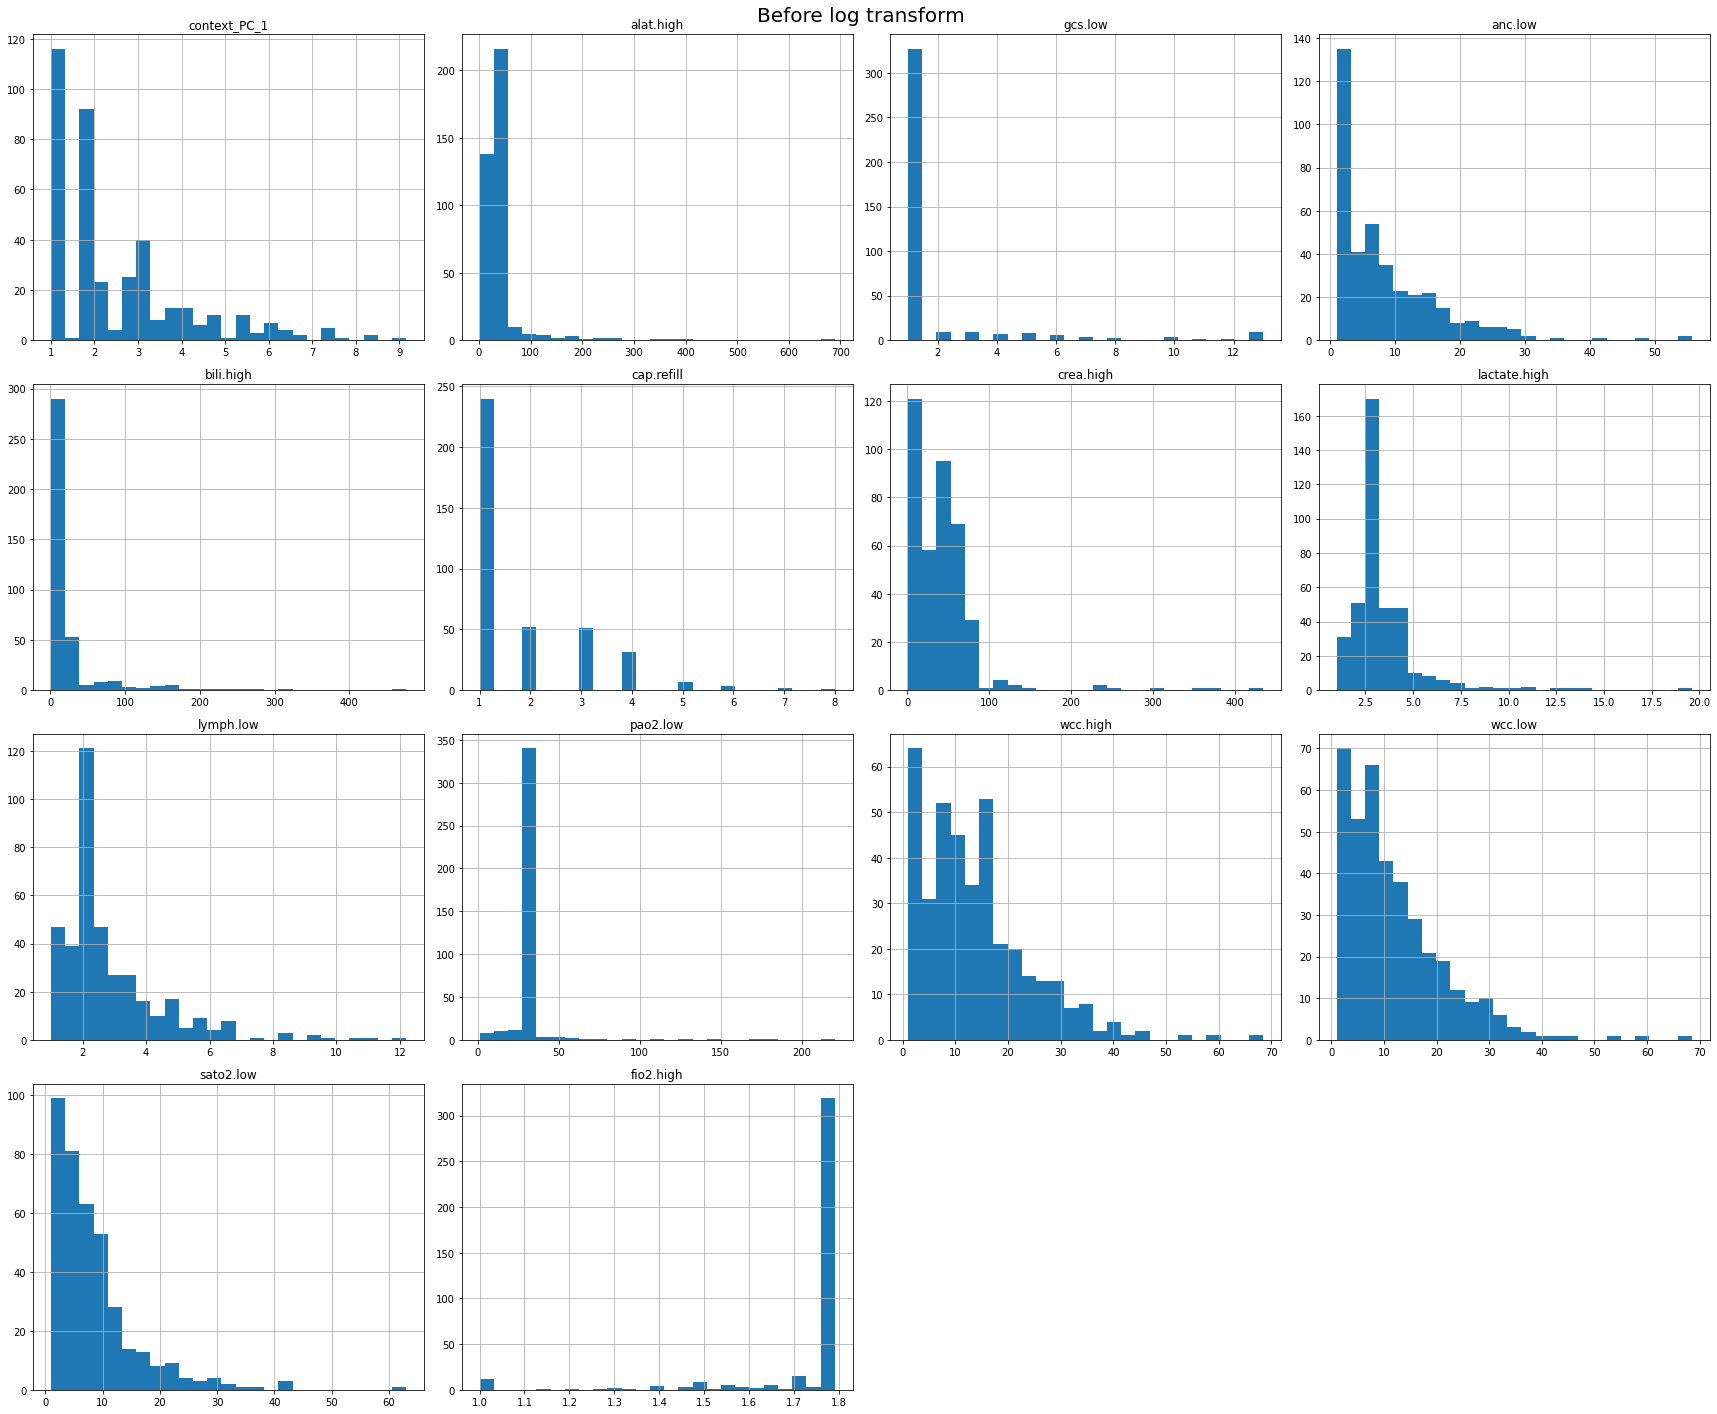

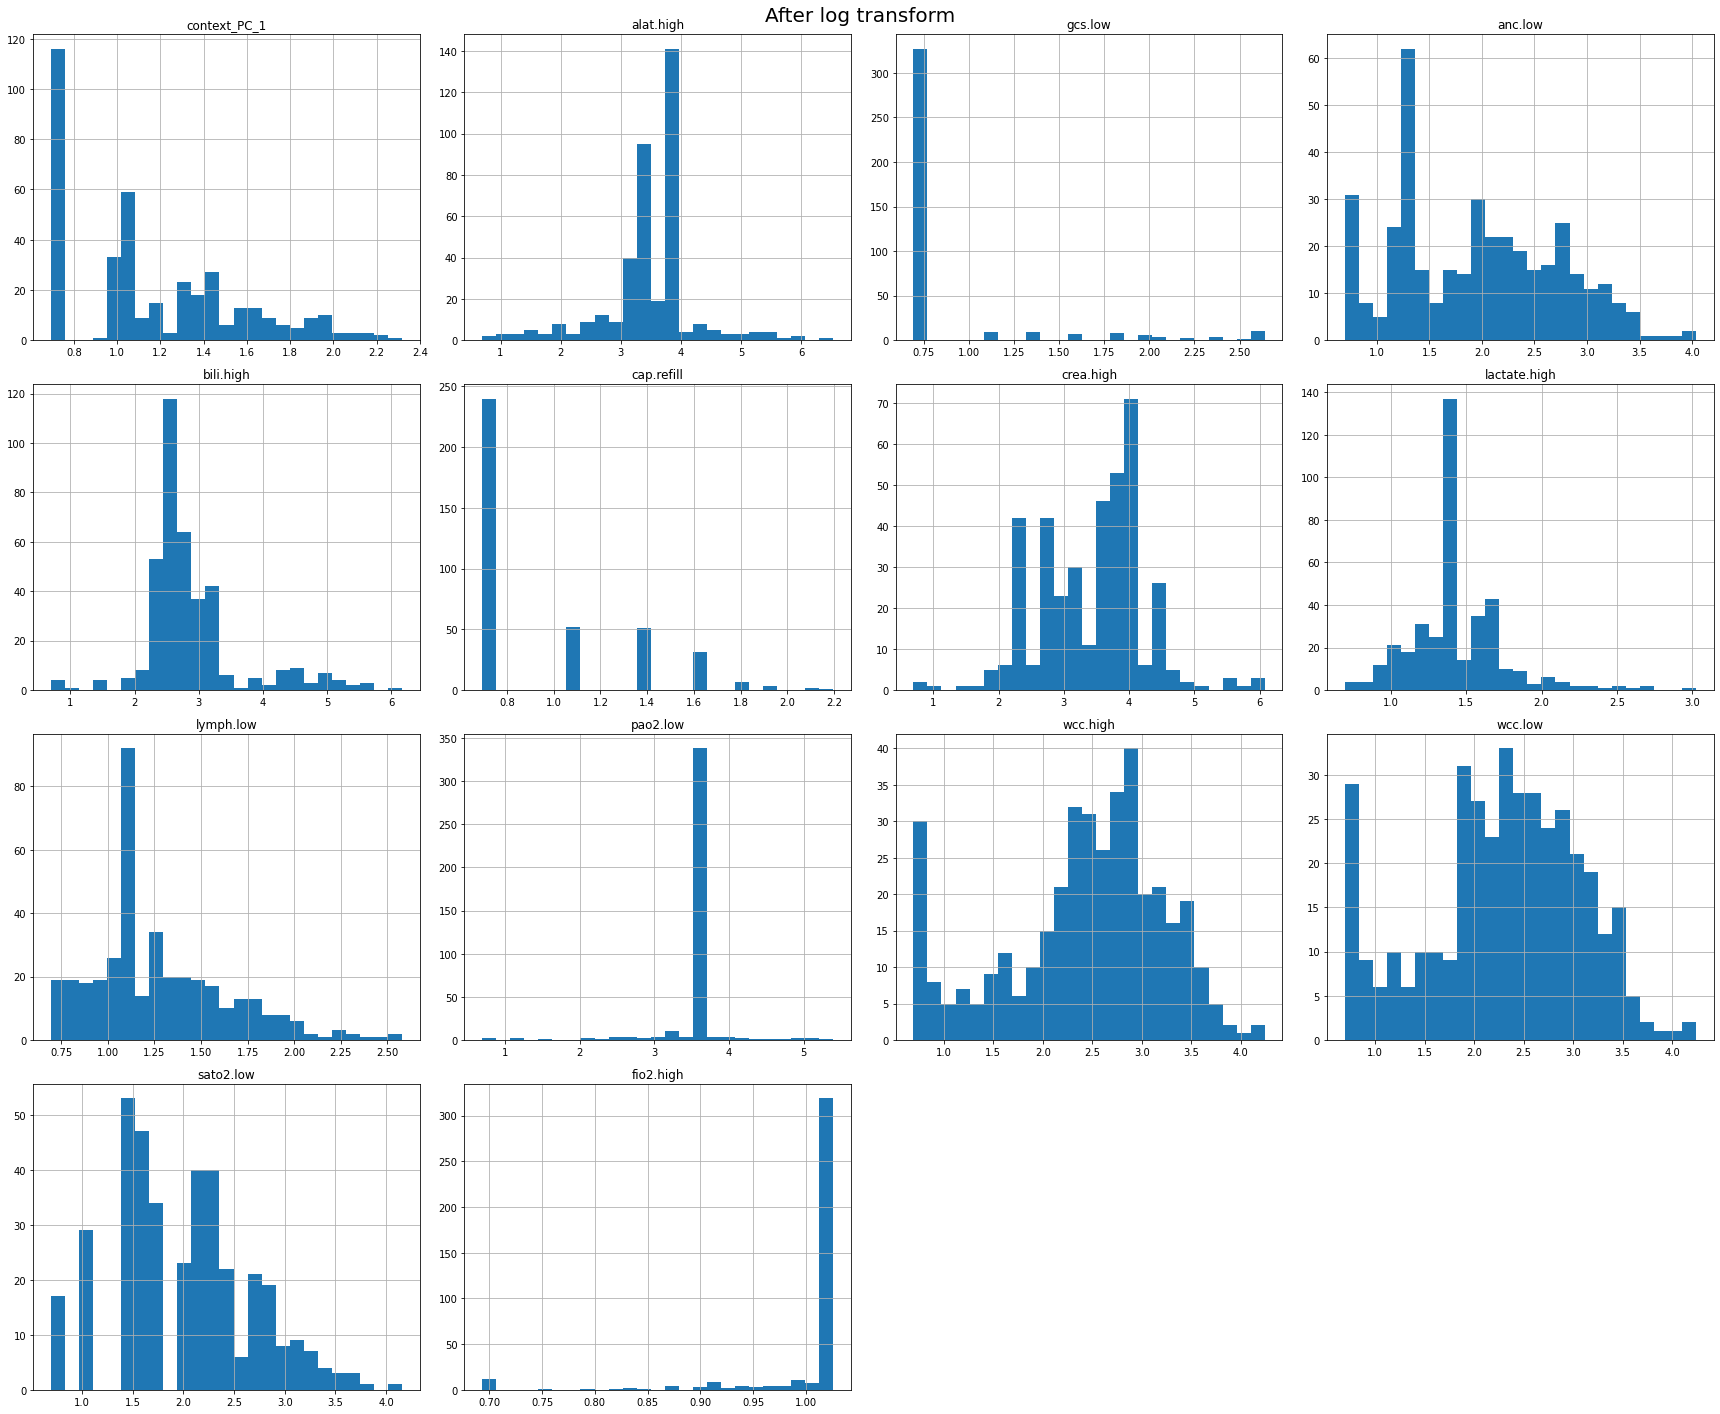

In [14]:
clinical_binary_pcas = pd.concat(binary_data, 1)
clinical_binary_pcas.columns = pc_cols
clinical_continous = clinical_view[continous_cols]
clinical_view_new = pd.concat([clinical_continous, clinical_binary_pcas], 1)

cols_to_log = [
    "context_PC_1",
    "alat.high",
    "gcs.low",
    "anc.low",
    "bili.high",
    "cap.refill",
    "crea.high",
    "lactate.high",
    "lymph.low",
    "pao2.low",
    "wcc.high",
    "wcc.low",
    "sato2.low",
    "fio2.high",
]

clinical_view_new["sato2.low"] = (
    clinical_view_new["sato2.low"].max() - clinical_view_new["sato2.low"]
)
clinical_view_new["gcs.low"] = (
    clinical_view_new["gcs.low"].max() - clinical_view_new["gcs.low"]
)
clinical_view_new["fio2.high"] = clinical_view_new["fio2.high"].max() - clinical_view_new["fio2.high"]

clinical_view_new[cols_to_log] = (
    clinical_view_new[cols_to_log] - clinical_view_new[cols_to_log].min() + 1
)

clinical_view_new[cols_to_log].hist(bins=25, figsize=(24, 20))
plt.suptitle("Before log transform", fontsize=20)
plt.tight_layout()
plt.show()

clinical_view_new[cols_to_log] = np.log(clinical_view_new[cols_to_log] + 1)
clinical_view_new[cols_to_log].hist(bins=25, figsize=(24, 20))
plt.suptitle("After log transform", fontsize=20)
plt.tight_layout()
plt.show()

# PCA on GRM

In [15]:
from os.path import join
from pandas_plink import read_grm
from pandas_plink import get_data_folder
K = read_grm("../spss_grm_pca_20220706/SPSS.QC.impute2_plink2.allfiles.king_mind1_maf01_geno2.info8.grm.grm.bin")

In [16]:
GRM_id = K[0].coords['sample_0']
GRM_col = K[0].coords['sample_1']
GRM = K[0].data
GRM = pd.DataFrame(GRM, index=GRM_id, columns=GRM_col)
GRM.index = GRM.index.str.replace('_', '-')
GRM.columns = GRM.columns.str.replace('_', '-')

In [17]:
common_ids = clinical_view_new.loc[clinical_view_new.index.isin(GRM.index)].index
GRM = GRM.loc[common_ids, common_ids]
clinical_view_new = clinical_view_new.loc[common_ids]
proteome_view = proteome_view.loc[common_ids]

# standardization 

In [18]:
from sklearn.decomposition import PCA
sc = StandardScaler()
pca = PCA()
GRM_PCs = pca.fit_transform(GRM)
GRM_PCs = GRM_PCs[:, :10]
GRM_PCs = sc.fit_transform(GRM_PCs)

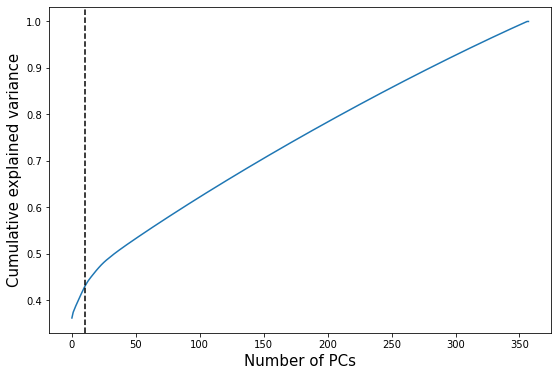

In [23]:
plt.figure(figsize=(9, 6))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.ylabel('Cumulative explained variance',fontsize=15)
plt.xlabel('Number of PCs', fontsize=15)
plt.axvline(x=10, color='black', linestyle='dashed')
plt.savefig('data/Cumulative_explained_variance_GRM.png', dpi=200)
plt.show()

In [18]:
GRM_PCs = pd.DataFrame(GRM_PCs, index=clinical_view_new.index, columns=['GRM PC {}'.format(i) for i in range (1, 11)])

In [24]:
sc = StandardScaler()
clinical_context = pd.DataFrame(
    sc.fit_transform(clinical_view_new[clinical_binary_pcas.columns.tolist() + ['fio2.high']]),
    columns=clinical_binary_pcas.columns.tolist() + ['fio2.high'],
    index=clinical_view_new.index,
)
clinical_context.to_csv("{}/ContextualViewStandardized.csv".format(data_path))


clinical_physio = pd.DataFrame(
    sc.fit_transform(clinical_view_new[clinical_continous.columns.drop(['fio2.high'])]),
    columns=clinical_continous.columns.drop(['fio2.high']),
    index=clinical_view_new.index,
)
clinical_physio.to_csv("{}/PhysioViewStandardized.csv".format(data_path))

clinical_view_new_std = pd.concat([clinical_physio, clinical_context], 1)

proteome_view_std = pd.DataFrame(
    sc.fit_transform(proteome_view),
    columns=proteome_view.columns,
    index=proteome_view.index,
)
proteome_view_std.to_csv("{}/ProteomeViewStandardized.csv".format(data_path))

clinical_binary = clinical_view[binary_cols].astype(int)
clinical_binary.to_csv('{}/ClinicalBinary.csv'.format(data_path))

In [23]:
clinical_physio

,temp.high,temp.low,rr.high,sato2.low,hr.high,cap.refill,sbp.low,map.low,gcs.low,wcc.high,...,platelets.low,paco2.high,pao2.low,lactate.high,bili.high,crea.high,inr.high,alat.high,age.at.bc,ccc.summary
BE-001,-0.224542,-0.658596,-0.100526,-0.598190,-0.499341,1.164839,-0.574013,-0.849425,1.128636,-1.161777,...,-1.292030,0.213985,0.075098,3.103359,1.100289,0.959171,4.492773,1.745538,0.707084,0.221832
BE-003,0.389874,-0.034516,-0.535871,-0.099865,-1.091177,-0.713162,0.218151,1.232032,1.128636,-0.690454,...,0.195970,0.213985,0.075098,-0.145471,0.035517,0.508820,-0.323461,-0.387925,0.564928,0.221832
BE-004,1.209096,3.460330,-0.342384,0.097898,-0.025872,-0.713162,0.451140,2.373476,-0.388521,-2.189799,...,-1.479705,0.213985,0.075098,0.489401,-0.351695,-1.456926,-0.323461,-2.750888,-0.379567,0.221832
BE-005,1.618707,0.464748,-0.342384,-0.598190,-0.795259,-0.713162,1.383097,0.627738,-0.388521,0.076166,...,-0.052030,0.213985,0.075098,-0.145471,0.331732,1.200204,-0.323461,-0.041920,1.838911,-0.823113
BE-007,-0.122140,1.213643,0.576676,-0.598190,-0.025872,-0.713162,0.777325,-0.177987,-0.388521,0.653859,...,-0.980354,0.213985,0.075098,0.614553,-0.351695,-0.710307,-0.323461,0.461437,-0.757846,-0.823113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZH-254,-0.019737,1.088827,1.592479,1.843519,0.980249,1.769421,-1.133187,-1.050856,-0.388521,1.309621,...,1.127645,0.213985,0.075098,0.007162,-0.351695,-1.335861,-0.323461,0.461437,-0.786760,0.221832
ZH-255,-1.043764,-0.034516,2.076195,1.454950,0.329230,1.164839,-1.692361,-1.319431,2.353520,0.565821,...,1.898456,-2.292925,3.429121,-1.375050,-0.351695,0.775942,-0.323461,0.365701,-0.804228,3.356666
ZH-257,0.389874,1.088827,0.044588,-0.328167,1.039433,1.164839,2.454847,1.970613,-0.388521,-0.961200,...,1.080726,0.213985,0.075098,-1.375050,0.162419,-1.335861,0.597906,-2.456608,-0.594608,-0.823113
ZH-258,-0.224542,-0.408964,0.092960,-0.928672,-0.144239,-0.713162,-0.294425,-0.513706,-0.388521,0.393422,...,-0.025219,0.213985,0.075098,-0.475077,-0.351695,-1.335861,-0.323461,0.461437,-0.777122,-0.823113


In [20]:
Cov = np.hstack([clinical_physio["age.at.bc"].values.reshape(-1, 1), GRM_PCs])

kcc_input = {}
kcc_input["Cov"] = Cov
kcc_input["Physio"] = clinical_physio.values
kcc_input["Contextual"] = clinical_context.values
kcc_input["Clinical"] = clinical_view_new_std.values
kcc_input["Proteome"] = proteome_view_std.values
savemat(
    "data/Cov_AgeGRM_NormalImputation.mat", kcc_input
)